In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/IPL_ball_by_ball_updated till 2024.csv')

<ipython-input-24-95417b7305fc>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/IPL_ball_by_ball_updated till 2024.csv')


In [ ]:
# Filter data for CJ Ferguson
ferguson_batting_data = df[df['Striker'] == 'CJ Ferguson']
ferguson_runs = ferguson_batting_data['runs_scored'].dropna()

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


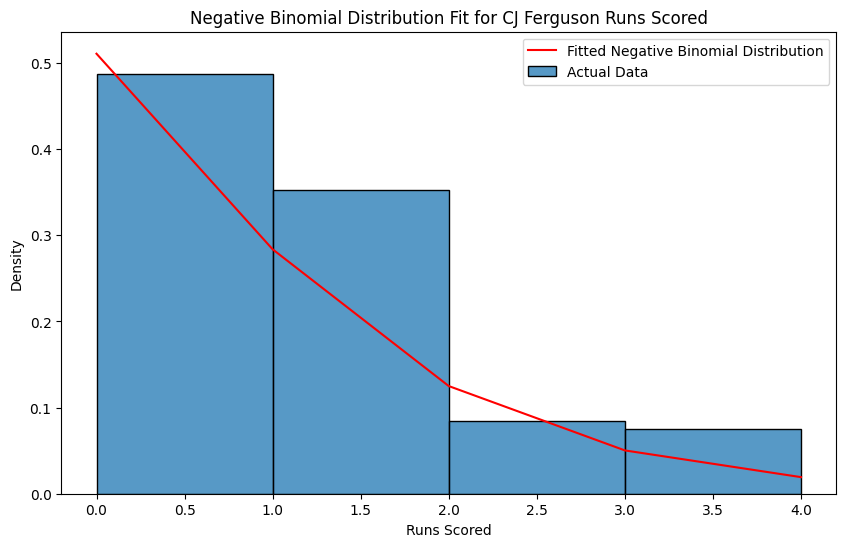

In [ ]:
# Fit a Negative Binomial distribution
mean_runs = np.mean(ferguson_runs)
var_runs = np.var(ferguson_runs)
p = mean_runs / var_runs
r = mean_runs * (mean_runs / (var_runs - mean_runs))

nb_dist = stats.nbinom(r, p)

# Plot the fitted distribution against the actual data
plt.figure(figsize=(10, 6))
sns.histplot(ferguson_runs, bins=range(int(ferguson_runs.max()) + 1), kde=False, stat="density", label="Actual Data")
x = np.arange(0, int(ferguson_runs.max()) + 1)
plt.plot(x, nb_dist.pmf(x), 'r-', label="Fitted Negative Binomial Distribution")
plt.xlabel('Runs Scored')
plt.ylabel('Density')
plt.title('Negative Binomial Distribution Fit for CJ Ferguson Runs Scored')
plt.legend()
plt.show()
